### Importación de datos



In [84]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
def cambio_nombre(texto):
  match texto:
    case "ingresos_tienda1" | "prom_costo_envio_tienda1" | "prom_calificaciones_tienda1":
      return "tienda 1"
    case "ingresos_tienda2" | "prom_costo_envio_tienda2" | "prom_calificaciones_tienda2":
      return "tienda 2"
    case "ingresos_tienda3"| "prom_costo_envio_tienda3" | "prom_calificaciones_tienda3":
      return "tienda 3"
    case _:
      return "tienda 4"

In [89]:
ingresos_totales = {
"ingresos_tienda1" : float(tienda1['Precio'].sum()),
"ingresos_tienda2" : float(tienda2['Precio'].sum()),
"ingresos_tienda3" : float(tienda3['Precio'].sum()),
"ingresos_tienda4" : float(tienda4['Precio'].sum())
}

df_ingresos_totales = pd.DataFrame.from_dict(ingresos_totales, orient='index', columns=['Ingresos'])

tienda_mayor_ingreso = max(ingresos_totales, key=ingresos_totales.get)
mayor_ingreso = ingresos_totales[tienda_mayor_ingreso]

tienda_menor_ingreso = min(ingresos_totales, key=ingresos_totales.get)
menor_ingreso = ingresos_totales[tienda_menor_ingreso]

tienda_mayor_ingreso = cambio_nombre(tienda_mayor_ingreso)
tienda_menor_ingreso = cambio_nombre(tienda_menor_ingreso)

# 2. Ventas por categoría

In [55]:
ventas_por_categorias_totales = {
"ventas_por_categorias_tienda1" : (tienda1.groupby("Categoría del Producto")[["Categoría del Producto"]].count()).rename(columns={"Categoría del Producto":"Cantidad"}),
"ventas_por_categorias_tienda2" : (tienda2.groupby("Categoría del Producto")[["Categoría del Producto"]].count()).rename(columns={"Categoría del Producto":"Cantidad"}),
"ventas_por_categorias_tienda3" : (tienda3.groupby("Categoría del Producto")[["Categoría del Producto"]].count()).rename(columns={"Categoría del Producto":"Cantidad"}),
"ventas_por_categorias_tienda4" : (tienda4.groupby("Categoría del Producto")[["Categoría del Producto"]].count()).rename(columns={"Categoría del Producto":"Cantidad"})
}

categorias_mas_vendidas_tienda1 = ventas_por_categorias_totales["ventas_por_categorias_tienda1"].sort_values('Cantidad', ascending=False).head(3)
categorias_mas_vendidas_tienda2 = ventas_por_categorias_totales["ventas_por_categorias_tienda2"].sort_values('Cantidad', ascending=False).head(3)
categorias_mas_vendidas_tienda3 = ventas_por_categorias_totales["ventas_por_categorias_tienda3"].sort_values('Cantidad', ascending=False).head(3)
categorias_mas_vendidas_tienda4 = ventas_por_categorias_totales["ventas_por_categorias_tienda4"].sort_values('Cantidad', ascending=False).head(3)

categorias_menos_vendidas_tienda1 = ventas_por_categorias_totales["ventas_por_categorias_tienda1"].sort_values('Cantidad', ascending=True).head(3)
categorias_menos_vendidas_tienda2 = ventas_por_categorias_totales["ventas_por_categorias_tienda2"].sort_values('Cantidad', ascending=True).head(3)
categorias_menos_vendidas_tienda3 = ventas_por_categorias_totales["ventas_por_categorias_tienda3"].sort_values('Cantidad', ascending=True).head(3)
categorias_menos_vendidas_tienda4 = ventas_por_categorias_totales["ventas_por_categorias_tienda4"].sort_values('Cantidad', ascending=True).head(3)

# 3. Calificación promedio de la tienda


In [65]:
prom_calificaciones_totales = {
"prom_calificaciones_tienda1" : float(tienda1['Calificación'].sum() / tienda1['Calificación'].count()),
"prom_calificaciones_tienda2" : float(tienda2['Calificación'].sum() / tienda2['Calificación'].count()),
"prom_calificaciones_tienda3" : float(tienda3['Calificación'].sum() / tienda3['Calificación'].count()),
"prom_calificaciones_tienda4" : float(tienda4['Calificación'].sum() / tienda4['Calificación'].count())
}

tienda_mayor_prom_calificacion = max(prom_calificaciones_totales, key=prom_calificaciones_totales.get)
mayor_prom_calificacion = round(prom_calificaciones_totales[tienda_mayor_prom_calificacion], 2)

tienda_menor_prom_calificacion = min(prom_calificaciones_totales, key=prom_calificaciones_totales.get)
menor_prom_calificacion = round(prom_calificaciones_totales[tienda_menor_prom_calificacion], 2)

tienda_mayor_prom_calificacion = cambio_nombre(tienda_mayor_prom_calificacion)
tienda_menor_prom_calificacion = cambio_nombre(tienda_menor_prom_calificacion)

# 4. Productos más y menos vendidos

In [71]:
ventas_por_producto_totales ={
"ventas_por_producto_tienda1" : (tienda1.groupby("Producto")[["Producto"]].count()).rename(columns={"Producto":"Cantidad"}),
"ventas_por_producto_tienda2" : (tienda2.groupby("Producto")[["Producto"]].count()).rename(columns={"Producto":"Cantidad"}),
"ventas_por_producto_tienda3" : (tienda3.groupby("Producto")[["Producto"]].count()).rename(columns={"Producto":"Cantidad"}),
"ventas_por_producto_tienda4" : (tienda4.groupby("Producto")[["Producto"]].count()).rename(columns={"Producto":"Cantidad"})
}

productos_mas_vendidos_tienda1 = ventas_por_producto_totales["ventas_por_producto_tienda1"].sort_values('Cantidad', ascending=False).head(3)
productos_mas_vendidos_tienda2 = ventas_por_producto_totales["ventas_por_producto_tienda2"].sort_values('Cantidad', ascending=False).head(3)
productos_mas_vendidos_tienda3 = ventas_por_producto_totales["ventas_por_producto_tienda3"].sort_values('Cantidad', ascending=False).head(3)
productos_mas_vendidos_tienda4 = ventas_por_producto_totales["ventas_por_producto_tienda4"].sort_values('Cantidad', ascending=False).head(3)

productos_menos_vendidos_tienda1 = ventas_por_producto_totales["ventas_por_producto_tienda1"].sort_values('Cantidad', ascending=True).head(3)
productos_menos_vendidos_tienda2 = ventas_por_producto_totales["ventas_por_producto_tienda2"].sort_values('Cantidad', ascending=True).head(3)
productos_menos_vendidos_tienda3 = ventas_por_producto_totales["ventas_por_producto_tienda3"].sort_values('Cantidad', ascending=True).head(3)
productos_menos_vendidos_tienda4 = ventas_por_producto_totales["ventas_por_producto_tienda4"].sort_values('Cantidad', ascending=True).head(3)

# 5. Envío promedio por tienda

In [66]:
prom_costo_envio_totales = {
"prom_costo_envio_tienda1" : float(tienda1['Costo de envío'].sum() / tienda1['Costo de envío'].count()),
"prom_costo_envio_tienda2" : float(tienda2['Costo de envío'].sum() / tienda2['Costo de envío'].count()),
"prom_costo_envio_tienda3" : float(tienda3['Costo de envío'].sum() / tienda3['Costo de envío'].count()),
"prom_costo_envio_tienda4" : float(tienda4['Costo de envío'].sum() / tienda4['Costo de envío'].count())
}

tienda_mayor_costo_envio = max(prom_costo_envio_totales, key=prom_costo_envio_totales.get)
mayor_costo_envio = round(prom_costo_envio_totales[tienda_mayor_costo_envio], 2)

tienda_menor_costo_envio = min(prom_costo_envio_totales, key=prom_costo_envio_totales.get)
menor_costo_envio = round(prom_costo_envio_totales[tienda_menor_costo_envio], 2)

tienda_mayor_costo_envio = cambio_nombre(tienda_mayor_costo_envio)
tienda_menor_costo_envio = cambio_nombre(tienda_menor_costo_envio)

# **Informe Final**

Este informe tiene como objetivo validar que tienda es menos rentable para tener la posibilidad de vendarla o bien cambiar su estrategia de negocio, con el fin de tener nuevas inversiones.

A continuación el detalle del análisis:

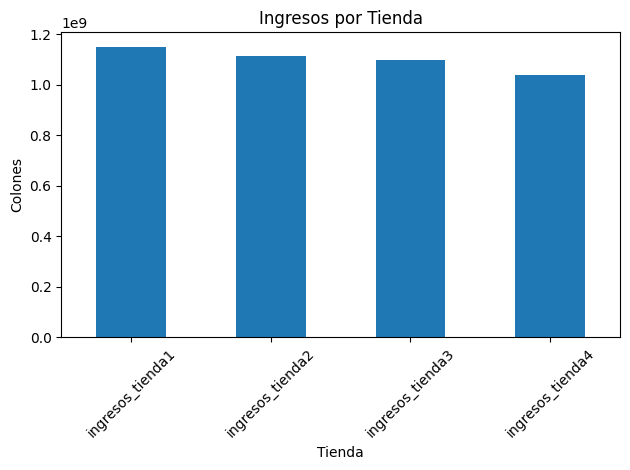



La tienda que presenta el mayor ingreso es la tienda 1 con un total de: 1150880400.0
La tienda que presenta el menor ingreso es la tienda 4 con un total de: 1038375700.0


La tienda que presenta el mayor promedio de calificación es la tienda 3 con un total de: 4.05 puntos
La tienda que presenta el menor promedio de calificación es la tienda 1 con un total de: 3.98 puntos


La tienda que presenta el mayor costo promedio de envío es la tienda 1 con un total de: 26018.61
La tienda que presenta el menor costo promedio de envío es la tienda 4 con un total de: 23459.46


In [92]:
df_ingresos_totales.plot(kind='bar', legend=False)
plt.title('Ingresos por Tienda')
plt.ylabel('Colones')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")

print(f"La tienda que presenta el mayor ingreso es la {tienda_mayor_ingreso} con un total de: {mayor_ingreso}")
print(f"La tienda que presenta el menor ingreso es la {tienda_menor_ingreso} con un total de: {menor_ingreso}")
print("\n")

print(f"La tienda que presenta el mayor promedio de calificación es la {tienda_mayor_prom_calificacion} con un total de: {mayor_prom_calificacion} puntos")
print(f"La tienda que presenta el menor promedio de calificación es la {tienda_menor_prom_calificacion} con un total de: {menor_prom_calificacion} puntos")
print("\n")

print(f"La tienda que presenta el mayor costo promedio de envío es la {tienda_mayor_costo_envio} con un total de: {mayor_costo_envio}")
print(f"La tienda que presenta el menor costo promedio de envío es la {tienda_menor_costo_envio} con un total de: {menor_costo_envio}")

**Conclusión**

Como se puede observar la tienda que presenta menores ingresos es la tienda 4, sin embargo la tienda 1 que es la que tiene mayores ingresos, tiene el peor promedio de calificación y el mayor costo promedio de envío.

Por lo que recomiendo realizar dos movimientos:

1.   Trabajar en mejoras de calificación y reducción de costos para la tienda 1.
2.   Y cerrar o vender la tienda 4 y reinvertir en una nueva tienda.

